In [16]:
import pandas
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import numpy as np

df = pandas.read_csv("table.csv")

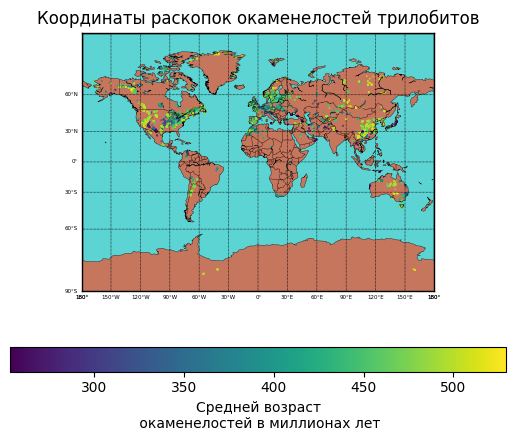

In [2]:
ages_mean = ((df['max_age_mya'] + df['min_age_mya']) / 2).to_list()

lons = df["longitude"]
lats = df["latitude"]

parallels = np.arange(-90,90,30)
meridians = np.arange(0,360,30)

map = Basemap(projection="mill", lon_0=0)

x, y = map(lons, lats)

map.drawparallels(parallels, linewidth=0.5, labels=[1, 0, 0, 0], fontsize=4)
map.drawmeridians(meridians, linewidth=0.5, labels=[0, 0, 0, 1], fontsize=4)
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.drawmapboundary(fill_color="#5cd4d4")

map.fillcontinents(color="#c7765e", lake_color="#5cd4d4")

map.scatter(x, y, 0.1, marker='o', c=ages_mean, cmap="viridis")

plt.colorbar(location="bottom", label='Средней возраст\n окаменелостей в миллионах лет')

plt.title("Координаты раскопок окаменелостей трилобитов")
plt.savefig("graph.png", dpi=500)
plt.show()

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29039 entries, 0 to 29038
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   scientific_name         29039 non-null  object 
 1   order                   29039 non-null  object 
 2   order_num               29039 non-null  object 
 3   family                  29039 non-null  object 
 4   family_num              29039 non-null  object 
 5   genus                   29039 non-null  object 
 6   genus_num               29039 non-null  int64  
 7   species                 29039 non-null  object 
 8   early_interval          29039 non-null  object 
 9   late_interval           2556 non-null   object 
 10  max_age_mya             29039 non-null  float64
 11  min_age_mya             29039 non-null  float64
 12  country                 28997 non-null  object 
 13  state                   22914 non-null  object 
 14  longitude               29039 non-null

In [18]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html("report.html")

d:\Python\practice\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\Python\practice\.venv\Lib\site-packages\sweetviz\graph.py:8: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


страны ес в одной группу (country) с название EU:

In [ ]:
df.loc[(-30 < df["longitude"]) & (df["longitude"] < 30) & (20 < df["latitude"]) & (df["latitude"] < 70), "country"] = "EU"
#df["country_EU"] = df["country"].loc[(-30 < df["longitude"]) & (df["longitude"] < 30) & (20 < df["latitude"]) & (df["latitude"] < 70)]
#df["country_CN"] = df["country"].loc[(90 < df["longitude"]) & (df["longitude"] < 130) & (10 < df["latitude"]) & (df["latitude"] < 40)]

In [55]:
def count_arch(preservation_mode):
    if str(preservation_mode).find("body") != -1:
        preservation_mode_conut = len(str(preservation_mode).split(','))
        return preservation_mode_conut
    else:
        return 0

In [56]:
df['count_mode'] = df['preservation_mode'].apply(count_arch)

In [62]:
replaceDiet = {"detritivore" : "deposit feeder",
                "microcarnivore" : "carnivore",
                "carnivore diet" : "carnivore",
                "suspension feeder" : "deposit feeder"}

df["new_diet"] = df["diet"].replace(replaceDiet)

In [15]:
def FindLastName(scientific_name):
    nameSplit = scientific_name.split(" ")
    indexLastName = len(nameSplit) - 1

    return nameSplit[indexLastName]

In [17]:
#df["scientific_name_second"] = df["scientific_name"].str.split(" ").str.get(0)

df["scientific_name_last_name"] = df["scientific_name"].apply(FindLastName)